Vincent Earl Andrews 
<h3 align="center">Comparative Planetology: Assignment 2</h3>

In [35]:
import math
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
from math import sin, cos, pi

<b>Problem 1</b> <br>
a - Hurricane Franklin

In [76]:
Omega_E = 7.292e-5 # rad/s
def rossby_num(U, L, omega, l):
    return U / (2 * L * omega * sin(l))

# as a tropical storm 
lat_trop = math.radians(16.1) # deg North
v_trop = 40.2773 / 2.23693629 #  m/s
L_trop = 30 * 1609.344 # meters

# as a hurricane 
lat_H = math.radians(20.3) # deg North
v_H = 86.3085 / 2.23693629 # m/s
L_H = 350 * 1609.344 # meters

# calculate rossby number
print("Hurricane Franklin as a tropical storm:",rossby_num(v_trop, L_trop, Omega_E, lat_trop))
print("Hurricane Franklin as a hurricane:",rossby_num(v_H, L_H, Omega_E, lat_H))

Hurricane Franklin as a tropical storm: 9.221193187935
Hurricane Franklin as a hurricane: 1.353809127001251


The Rossby number is an order of magnitude that gives us information about the internal forces and the coriolis force. It is directly proportional to the speed, U; therefore, so greater speeds will indicate a larger Rossby number. On the contrary, it is inversely proportional to the scale length, L; therefore, greater scale lengths will often reduce the Rossby number. 

In this case, Hurricane Franklin initially starts at a slower speed and smaller scale length but grows in size and intensity as the strom develops. The increase in speed should increase the Rossby number, however the scale length of a hurricane becomes much larger so that the Rossby number decreases. The Rossby number tends to decrease as hurricanes develop since the size of hurricanes becomes much larger. The higher Rossby number indicates the tropical storm is more dominated by the coriolis effect, while the lower Rossby number for hurricanes tells us that they are dominated by internal forces. 

b - Jupiter's Great Red Spot

In [66]:
Omega_J = 1.76e-4
lat_red = math.radians(22) # deg South
v_red = 268 / 2.23693629 # m/s
L_red = 10159 * 1609.344 # meters

print("Jupiter's Great Red Spot:", rossby_num(v_red, L_red, Omega_J, lat_red))

Jupiter's Great Red Spot: 0.05557292460713629


c - Neptune's Great Dark Spot

In [67]:
Omega_N = 1.083e-4
lat_dark = math.radians(25) # deg South
v_dark = 583.3333 # m/s
L_dark = 4600 * 1609.344 # meters

print("Neptune's Great Dark Spot:", rossby_num(v_dark, L_dark, Omega_N, lat_dark))

Neptune's Great Dark Spot: 0.8608021450969483


d - American Midwest Supercell

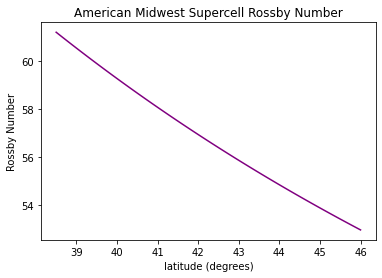

Average American Midwest Supercell: 56.797795762450065


In [68]:
lat_vals = np.linspace(math.radians(38.5), math.radians(46), 100)
lat_deg = np.linspace(38.5, 46, 100)
v_super = 60 / 2.23693629 # m/s
L_super = 3 * 1609.344 # meters

rossby_supercell = []
for l in lat_vals:
    r = rossby_num(v_super, L_super, Omega_E, l)
    rossby_supercell.append(r)
    
plt.plot(lat_deg, rossby_supercell, color = 'purple')
plt.title("American Midwest Supercell Rossby Number")
plt.xlabel("latitude (degrees)")
plt.ylabel("Rossby Number")
plt.show()

avg_super = statistics.mean(rossby_supercell)
print("Average American Midwest Supercell:", avg_super)

e - tornado In American Midwest

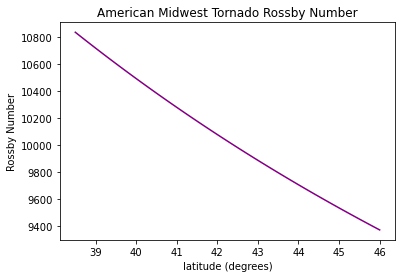

Average American Midwest Tornado: 10054.791100587689


In [57]:
# use same lat from before
v_tornado = 220 / 2.23693629 # m/s
L_tornado = 100 # meters

rossby_tornado = []
for l in lat_vals:
    r = rossby_num(v_tornado, L_tornado, Omega_E, l)
    rossby_tornado.append(r)
    
plt.plot(lat_deg, rossby_tornado, color = 'purple')
plt.title("American Midwest Tornado Rossby Number")
plt.xlabel("latitude (degrees)")
plt.ylabel("Rossby Number")
plt.show()

avg_tornado = statistics.mean(rossby_tornado)
print("Average American Midwest Tornado:", avg_tornado)

f - kitchen sink

In [84]:
# my kitchen sink is in melbourne florida so l = 28
Omega_E = 7.292e-5 # rad/s
lat_sink = math.radians(28) 
v_sink = 0.1 # m/s
L_sink = 0.0762 # meters

print("sink:", rossby_num(v_sink, L_sink, Omega_E, lat_sink))

sink: 19167.217986251


<b>Problem 2:</b> <br>
I marked 3 distinctive cloud features on the map given and measured how much they displaced over the 20 minutes. I did so by using a ruler that gives the width of Florida of about 4 inches scaled to the 361 miles across that Florida actually is. I measured how much the features dispalced in inches and then converted this to miles from the proportionality 4 in = 361 miles. Next, I calculated the speed that each feature was moving using $v = \frac{d}{t}$ where d is the displacement and t = 1200 seconds. I took an average of the values calculated, giving me an average cloud speed of 38.29 m/s NE. The direction was determined from the isobars of pressure marked on the cloud map moving at roughly a 45 degree angle. 

The pressure gradients are given by
\begin{align}
    \frac{\partial P}{\partial x} = \rho \cdot f \cdot v
\end{align}

\begin{align}
    \frac{\partial P}{\partial y} = -\rho \cdot f \cdot u
\end{align}

Where u is the eastward component of geostrophic velocity and v is the northward component

In [83]:
f = 2 * Omega_E * sin(math.radians(28))
V = 38.29 # m/s

# estimate density using standard values
rho = ((101.5e3) / (287.052 * 287))

# calculate pressure gradient 
dp_x = rho * f * V
dp_y = -rho * f * V

print("The pressure gradient in x and y is:")
print(dp_x, "Pa/m and", dp_y, "Pa/m")

The pressure gradient in x and y is:
0.0032299431719324985 Pa/m and -0.0032299431719324985 Pa/m


<b> Problem 3:</b>

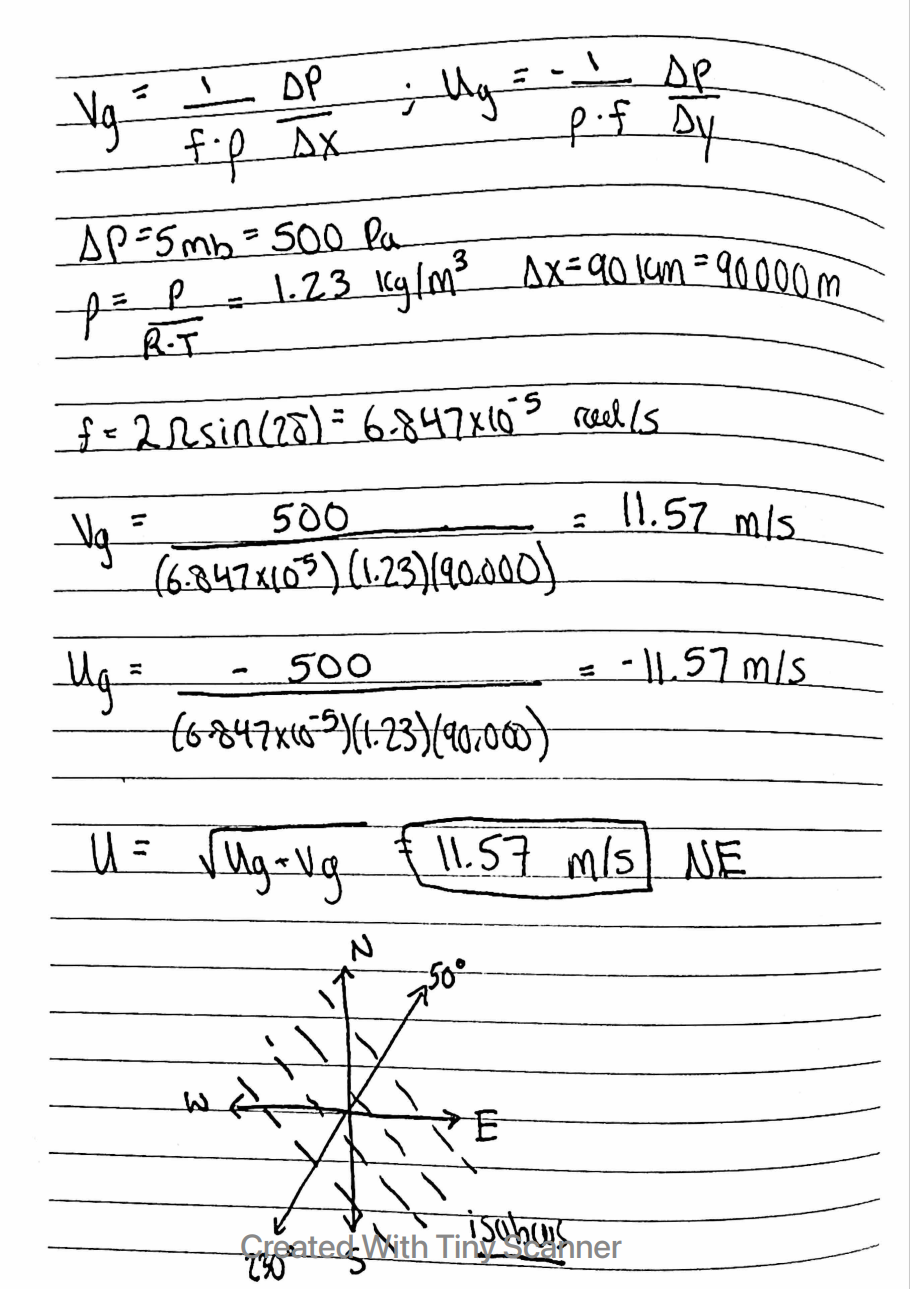

In [86]:
from IPython.display import Image
Image(filename="C:/Users/vince/OneDrive/Pictures/Screenshots/pic.png",width=800, height=400)

<b> Problem 4:</b> <br>
For the absolute vorticity to stay constant, we need zeta to increase as f decreases. At the North pole, the latitude is 90 degrees; therefore, f reduces to $f = 2\Omega$

In [74]:
def abs_vort(zeta, omega, lat):
    return zeta + 2 * omega * sin(lat)

v_MLB = abs_vort(5e-5, Omega_E, math.radians(28))

v_pole = v_MLB - 2 * (Omega_E)

print("absolute vorticity in Melbourne:", v_MLB)
print("relative vorticity at North Pole:",v_pole)

absolute vorticity in Melbourne: 0.00011846773271669431
relative vorticity at North Pole: -2.7372267283305685e-05


Since the relative vorticity at the North Pole is negative, this tells us that the winds are anticyclonic compared to the normal cyclonic motion when not at the North Pole. 